In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [3]:
df= yf.Ticker('TSLA').history(start='2020-01-01',end='2022-08-07')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-31,81.000000,84.258003,80.416000,83.666000,51428500,0,0.0
2020-01-02,84.900002,86.139999,84.342003,86.052002,47660500,0,0.0
2020-01-03,88.099998,90.800003,87.384003,88.601997,88892500,0,0.0
2020-01-06,88.094002,90.311996,88.000000,90.307999,50665000,0,0.0
2020-01-07,92.279999,94.325996,90.671997,93.811996,89410500,0,0.0
...,...,...,...,...,...,...,...
2022-06-30,673.530029,688.369995,656.590027,673.419983,31533500,0,0.0
2022-07-01,681.000000,690.690002,666.359985,681.789978,24781500,0,0.0
2022-07-05,669.000000,699.440002,648.500000,699.200012,28193700,0,0.0


In [4]:
#Calculate the simple moving average, standard deviation, upper and lower band
#get the time period (20 day)
period=20
#Calculate the Simple Moving Average(SMA)
df['SMA']=df['Close'].rolling(window=period).mean()
#Get the standard Deviation
df['STD']=df['Close'].rolling(window=period).std()
#Calculate the upper Bollinger band
df['Upper']=df['SMA']+(df['STD']*2)
#calculate the lower bollinger band
df['Lower']=df['SMA']-(df['STD']*2)
#Create a list of columns to keep
column_list = ['Close','SMA','Upper','Lower']
df[column_list]

,Close,SMA,Upper,Lower
Date,,,,
2019-12-31,83.666000,NaN,NaN,NaN
2020-01-02,86.052002,NaN,NaN,NaN
2020-01-03,88.601997,NaN,NaN,NaN
2020-01-06,90.307999,NaN,NaN,NaN
2020-01-07,93.811996,NaN,NaN,NaN
...,...,...,...,...
2022-06-30,673.419983,700.162997,767.019065,633.306930
2022-07-01,681.789978,695.502496,752.688842,638.316151
2022-07-05,699.200012,695.284998,752.375479,638.194517


Text(0, 0.5, 'USD Price For Tesla')

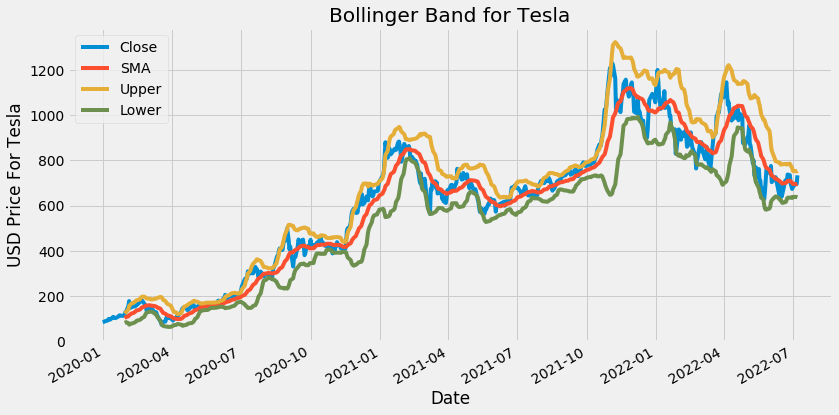

In [5]:
df[column_list].plot(figsize=(12.2,6.4))
plt.title('Bollinger Band for Tesla')
plt.ylabel('USD Price For Tesla')

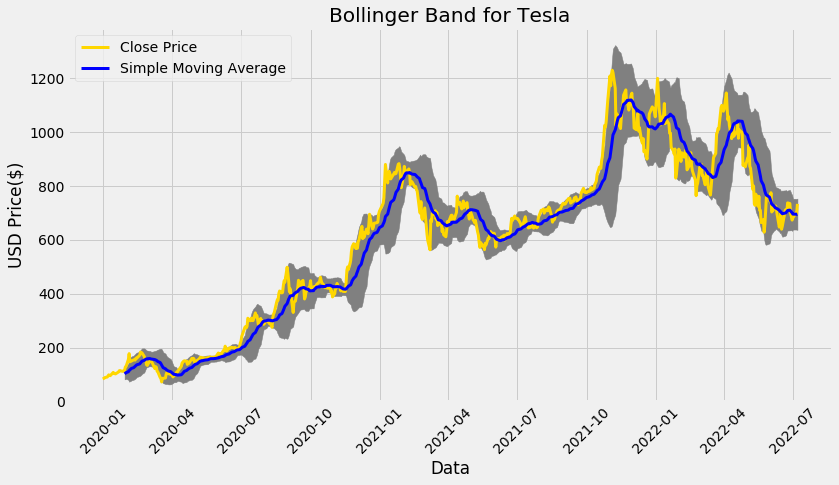

In [6]:
#plot and Shade the area between the two Bollinger bands 
#get the figure and the figure size
fig=plt.figure(figsize=(12.2,6.4))
ax=fig.add_subplot(1,1,1)#number of row,number of column ,number of index
x_axis=np.array(df.index)
#Plot and shade the area between the upper band and the lower band 
ax.fill_between(x_axis,df['Upper'],df['Lower'],color='gray')
#plot the closing price and moving Average 
ax.plot(x_axis,np.array(df['Close']),color='gold',lw=3,label='Close Price')#lw=line width
ax.plot(x_axis,np.array(df['SMA']),color='blue',lw=3,label='Simple Moving Average')#lw=line width
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Data')
ax.set_ylabel('USD Price($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [9]:
#create a function to get the buy and sell signals
def get_signal(data):
    
    buy_signal = []
    sell_signal = []
    value=0
    stock_in_hold=0
    for i in range(len(data['Close'])):
        if data['Close'][i] >data['Upper'][i] and data['Close'][i] > value and stock_in_hold>0: #then you should Sell
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
            stock_in_hold=stock_in_hold-0.10
            value=data['Close'][i]
        elif data['Close'][i]<data['Lower'][i] and stock_in_hold<1 :#Then you should buy
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
            stock_in_hold=stock_in_hold+0.10
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            
    return(buy_signal,sell_signal)

df['Buy']=get_signal(df)[0]
df['Sell']=get_signal(df)[1]

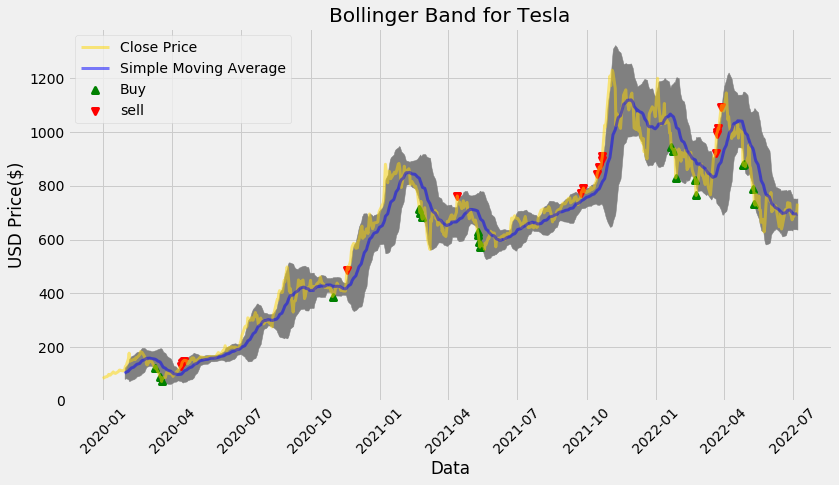

In [10]:
#plot and Shade the area between the two Bollinger bands 
#get the figure and the figure size
fig=plt.figure(figsize=(12.2,6.4))
ax=fig.add_subplot(1,1,1)#number of row,number of column ,number of index
x_axis=np.array(df.index)
#Plot and shade the area between the upper band and the lower band 
ax.fill_between(x_axis,df['Upper'],df['Lower'],color='gray')
#plot the closing price and moving Average 
ax.plot(x_axis,np.array(df['Close']),color='gold',lw=3,label='Close Price',alpha=0.5)#lw=line width
ax.plot(x_axis,np.array(df['SMA']),color='blue',lw=3,label='Simple Moving Average',alpha=0.5)#lw=line width
ax.scatter(x_axis,np.array(df['Buy']),color='Green',lw=3,label='Buy',marker='^',alpha=1)
ax.scatter(x_axis,np.array(df['Sell']),color='red',lw=3,label='sell',marker='v',alpha=1)
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Data')
ax.set_ylabel('USD Price($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()